In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from matplotlib import colors

### 1. Gray-Level Co-occurrence Matrix

In [81]:
def GLCM(img, d, theta):
    vals = np.unique(img)
    p = len(vals)
    C = np.zeros((p,p), dtype=np.int)
    
    # figure out displacement and direction
    if theta==0:
        delta_m = 0
        delta_n = d
        min_m = 0
        min_n = 0
        max_m = img.shape[0]
        max_n = img.shape[1]-d
    elif theta==45:
        delta_m = -d
        delta_n = d
        min_m = 1
        min_n = 0
        max_m = img.shape[0]
        max_n = img.shape[1]-d
    elif theta==90:
        delta_m = -d
        delta_n = 0
        min_m = 1
        min_n = 0
        max_m = img.shape[0]
        max_n = img.shape[1]
    elif theta==135:
        delta_m = -d
        delta_n = -d
        min_m = 1
        min_n = 1
        max_m = img.shape[0]
        max_n = img.shape[1]
    else:
        raise Error("angle %d not supported" % theta)
    
    for m in range(min_m, max_m):
        for n in range(min_n, max_n):
            i = np.where(vals==img[m,n])
            j = np.where(vals==img[m+delta_m, n+delta_n])
            C[i,j] += 1
    
    return C

In [82]:
image = np.asarray([[0,0,1,1],[0,0,1,1],[0,2,2,2],[2,2,3,3]])
print("original")
print(image)
print("0 degrees")
print(GLCM(image, 1, 0))
print("45 degrees")
print(GLCM(image, 1, 45))
print("90 degrees")
print(GLCM(image, 1, 90))
print("135 degrees")
print(GLCM(image, 1, 135))
print("90 degrees with d=2")
print(GLCM(image, 2, 90))

original
[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
0 degrees
[[2 2 1 0]
 [0 2 0 0]
 [0 0 3 1]
 [0 0 0 1]]
45 degrees
[[2 1 0 0]
 [0 1 0 0]
 [0 2 2 0]
 [0 0 1 0]]
90 degrees
[[3 0 0 0]
 [0 2 0 0]
 [2 2 1 0]
 [0 0 2 0]]
135 degrees
[[1 0 0 0]
 [1 1 0 0]
 [3 1 0 0]
 [0 0 2 0]]
90 degrees with d=2
[[1 0 2 0]
 [0 0 0 2]
 [3 2 0 0]
 [0 2 0 0]]


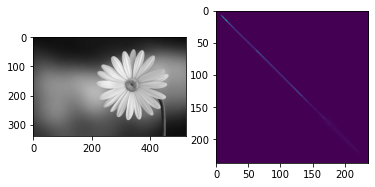

In [83]:
image = cv2.imread("flower.jpg",0)
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(GLCM(image, 1, 90))
plt.show()

### 2. Local Binary Partition

In [69]:
def LBP(image):
    res = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            val = image[i,j]
            num = ""
            try:
                num += str(int(image[i-1,j-1] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i-1,j] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i-1,j+1] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i,j-1] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i,j+1] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i+1,j-1] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i+1,j] > val))
            except:
                num += "0"
            try:
                num += str(int(image[i+1,j+1] > val))
            except:
                num += "0"
            res[i,j] = int(num, 2)
    return res

[[ 29.   0.  16.]
 [184.  96. 208.]
 [248. 224. 208.]]


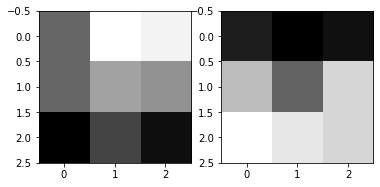

In [70]:
image = np.asarray([[110,205,198],[110,147,137],[47,89,56]])
print(LBP(image))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(LBP(image), cmap='gray')
plt.show()

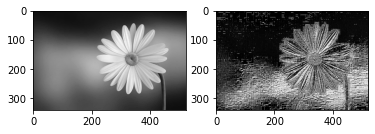

In [71]:
image = cv2.imread("flower.jpg",0)
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(LBP(image), cmap='gray')
plt.show()

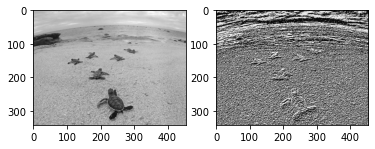

In [72]:
image = cv2.imread("turtles.png",0)
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(LBP(image), cmap='gray')
plt.show()

### 3. Texture Based Segmentation

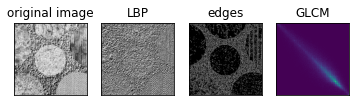

In [109]:
f = open('comb-1.raw')  
img = np.fromfile(f, dtype = np.uint8, count = 510*510)
img.shape = (img.size // 510, 510)
lbp = LBP(img)
edges = cv2.Canny(img,275,300)
glcm = GLCM(img, 1, 0)

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("original image")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2)
plt.imshow(lbp, cmap='gray')
plt.title("LBP")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3)
plt.imshow(edges, cmap='gray')
plt.title("edges")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4)
plt.imshow(glcm)
plt.title("GLCM")
plt.xticks([]), plt.yticks([])
plt.show()

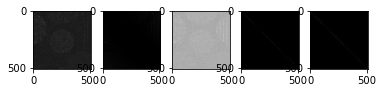

In [98]:
def glcm_stat(img, window_size):
    m,n = img.shape
    glcm_max = np.zeros(img.shape)
    glcm_contrast = np.zeros(img.shape)
    glcm_entropy = np.zeros(img.shape)
    glcm_moment = np.zeros(img.shape)
    glcm_homogeneity = np.zeros(img.shape)
    pad = int((window_size-1)/2)
    img = np.hstack((np.zeros((m,pad)), img, np.zeros((m,pad))))
    img = np.vstack((np.zeros((pad,n+2*pad)), img, np.zeros((pad,n+2*pad))))
    for i in range(pad, m-pad):
        for j in range(pad, n-pad):
            glcm_window1 = GLCM(img[i-pad:i+pad+1, j-pad:j+pad+1], 2, 0)
            glcm_window2 = GLCM(img[i-pad:i+pad+1, j-pad:j+pad+1], 2, 45)
            glcm_window3 = GLCM(img[i-pad:i+pad+1, j-pad:j+pad+1], 2, 90)
            glcm_window4 = GLCM(img[i-pad:i+pad+1, j-pad:j+pad+1], 2, 135)
            glcm_window = (glcm_window1+glcm_window2+glcm_window3+glcm_window4)/4
            glcm_max[i,j] = np.max(glcm_window)
            sum1 = 0
            sum2 = 0
            sum3 = 0
            sum4 = 0
            for k in range(i-pad,i+pad):
                for l in range(j-pad,j+pad):
                    sum1 += (k-l)**2*glcm_window[k-(i-pad),l-(j-pad)]
                    if glcm_window[k-(i-pad),l-(j-pad)] > 0:
                        sum2 += glcm_window[k-(i-pad),l-(j-pad)]*np.log(glcm_window[k-(i-pad),l-(j-pad)])
                    if not k==l:
                        sum3 += (glcm_window[k-(i-pad),l-(j-pad)])/(k-l)**2
                    sum4 += (glcm_window[k-(i-pad),l-(j-pad)])/(1 + np.abs(k-l))
            glcm_contrast[i,j] = sum1
            glcm_entropy[i,j] = -1*sum2
            glcm_moment[i,j] = sum3
            glcm_homogeneity[i,j] = sum4
            
    return glcm_max, glcm_contrast, glcm_entropy, glcm_moment, glcm_homogeneity

glcm_max, glcm_contrast, glcm_entropy, glcm_moment, glcm_homogeneity = glcm_stat(img, 3)

plt.subplot(1,5,1)
plt.imshow(glcm_max, cmap='gray')
plt.subplot(1,5,2)
plt.imshow(glcm_contrast, cmap='gray')
plt.subplot(1,5,3)
plt.imshow(glcm_entropy, cmap='gray')
plt.subplot(1,5,4)
plt.imshow(glcm_moment, cmap='gray')
plt.subplot(1,5,5)
plt.imshow(glcm_homogeneity, cmap='gray')
plt.show()

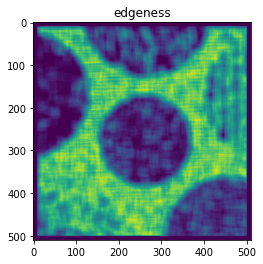

In [143]:
edgeness = np.zeros(img.shape)
m,n = img.shape
window_size = 21
pad = int((window_size-1)/2)
edge_p = np.hstack((np.zeros((m,pad)), edges, np.zeros((m,pad))))
edge_p = np.vstack((np.zeros((pad,n+2*pad)), edge_p, np.zeros((pad,n+2*pad))))
for i in range(pad, m-pad):
    for j in range(pad, n-pad):
        edgeness[i,j] = np.sum(edge_p[i-pad:i+pad+1, j-pad:j+pad+1])

plt.imshow(edgeness)
plt.title("edgeness")
plt.show()

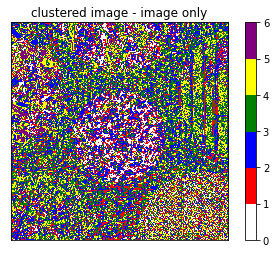

In [144]:
kmeans = KMeans(n_clusters=7)
res = kmeans.fit_predict(img.reshape(-1,1))
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("clustered image - image only")
plt.xticks([]), plt.yticks([])
plt.show()

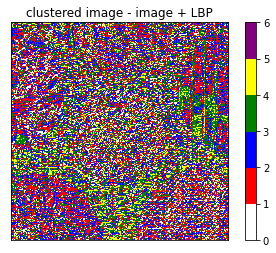

In [145]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1)))

kmeans = KMeans(n_clusters=7)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("clustered image - image + LBP")
plt.xticks([]), plt.yticks([])
plt.show()

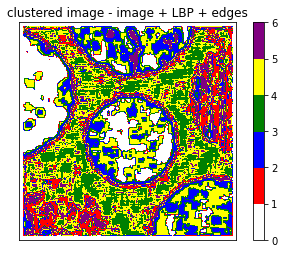

In [146]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1), edgeness.reshape(-1,1)))

kmeans = KMeans(n_clusters=7)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("clustered image - image + LBP + edges")
plt.xticks([]), plt.yticks([])
plt.show()

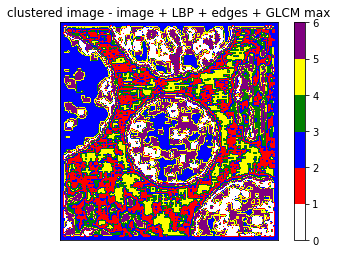

In [147]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1), edgeness.reshape(-1,1), glcm_max.reshape(-1,1)))

kmeans = KMeans(n_clusters=7)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("clustered image - image + LBP + edges + GLCM max")
plt.xticks([]), plt.yticks([])
plt.show()

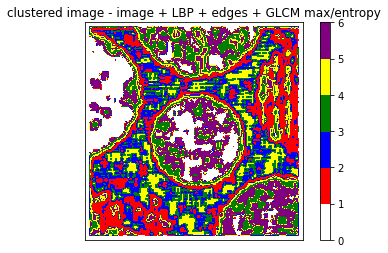

In [149]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1), edgeness.reshape(-1,1), glcm_max.reshape(-1,1), glcm_entropy.reshape(-1,1)))

kmeans = KMeans(n_clusters=7)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("clustered image - image + LBP + edges + GLCM max/entropy")
plt.xticks([]), plt.yticks([])
plt.show()

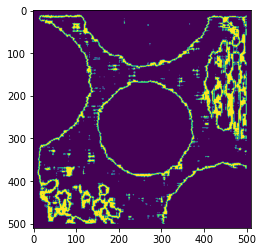

In [150]:
plt.imshow(clustered_img==1)

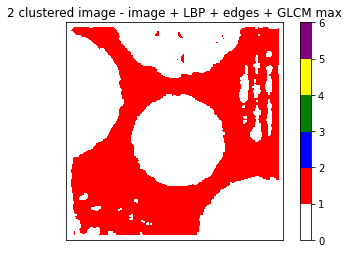

In [151]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1), edgeness.reshape(-1,1), glcm_max.reshape(-1,1)))

kmeans = KMeans(n_clusters=2)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("2 clustered image - image + LBP + edges + GLCM max")
plt.xticks([]), plt.yticks([])
plt.show()

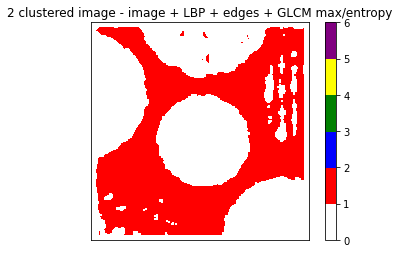

In [152]:
X = np.hstack((img.reshape(-1,1), lbp.reshape(-1,1), edgeness.reshape(-1,1), glcm_max.reshape(-1,1), glcm_entropy.reshape(-1,1)))

kmeans = KMeans(n_clusters=2)
res = kmeans.fit_predict(X)
clustered_img = res.reshape(510,510)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green', 'yellow', 'orange', 'purple'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(clustered_img, cmap=cmap, norm=norm)
plt.colorbar()
plt.title("2 clustered image - image + LBP + edges + GLCM max/entropy")
plt.xticks([]), plt.yticks([])
plt.show()